In [ ]:
#import libraries and Packages
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid_new.csv to covid_new.csv


In [ ]:
covid = pd.read_csv("covid_new.csv")
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
116800,116801,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,116802,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,116803,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,116804,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0
116804,116805,09/23/2020,Zuid-Holland,Netherlands,2020-09-24 04:23:38,29513.0,1372.0,0.0


In [ ]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values",covid.isnull().sum())
print("Checking Data-type",covid.dtypes)

Size/Shape of the dataset (116805, 8)
Checking for null values SNo                    0
ObservationDate        0
Province/State     35353
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [ ]:
covid.drop(["SNo"],1)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
116800,09/23/2020,Zaporizhia Oblast,Ukraine,2020-09-24 04:23:38,3149.0,49.0,1158.0
116801,09/23/2020,Zeeland,Netherlands,2020-09-24 04:23:38,1270.0,72.0,0.0
116802,09/23/2020,Zhejiang,Mainland China,2020-09-24 04:23:38,1282.0,1.0,1272.0
116803,09/23/2020,Zhytomyr Oblast,Ukraine,2020-09-24 04:23:38,5191.0,92.0,2853.0


In [ ]:
covid.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     35353
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [ ]:
#Convert argument to datetime.
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [ ]:
covid["ObservationDate"]

0        2020-01-22
1        2020-01-22
2        2020-01-22
3        2020-01-22
4        2020-01-22
            ...    
116800   2020-09-23
116801   2020-09-23
116802   2020-09-23
116803   2020-09-23
116804   2020-09-23
Name: ObservationDate, Length: 116805, dtype: datetime64[ns]

In [ ]:
#groupby operation for combining the results.
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [ ]:
print("Basic Information")
print("Total number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Basic Information
Total number of countries with Disease Spread:  223
Total number of Confirmed cases around the world 31779835.0
Total number of Recovered cases around the world 21890442.0
Total number of Death cases around the world 975104.0
Total number of Active cases around the world 8914289.0
Total number of Closed cases around the world 22865546.0
Approximate number of Confirmed Cases per Day around the World:  129186.0
Approximate number of Recovered Cases per Day around the World:  88986.0
Approximate number of Death Cases per Day around the World:  3964.0
Approximate number of Confirmed Cases per hour around the World:  5383.0
Approximate number of Recovered Cases per hour around the World:  3708.0
Approximate number of Death Cases per hour around the World:  165.0
Number of Confirmed Cases in last 24 hours:  262748.0
Number of Recovered Cases in last 24 hours:  266008.0
Number of Death Cases in last 24 hours:  5526.0


In [ ]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases Monthwise",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

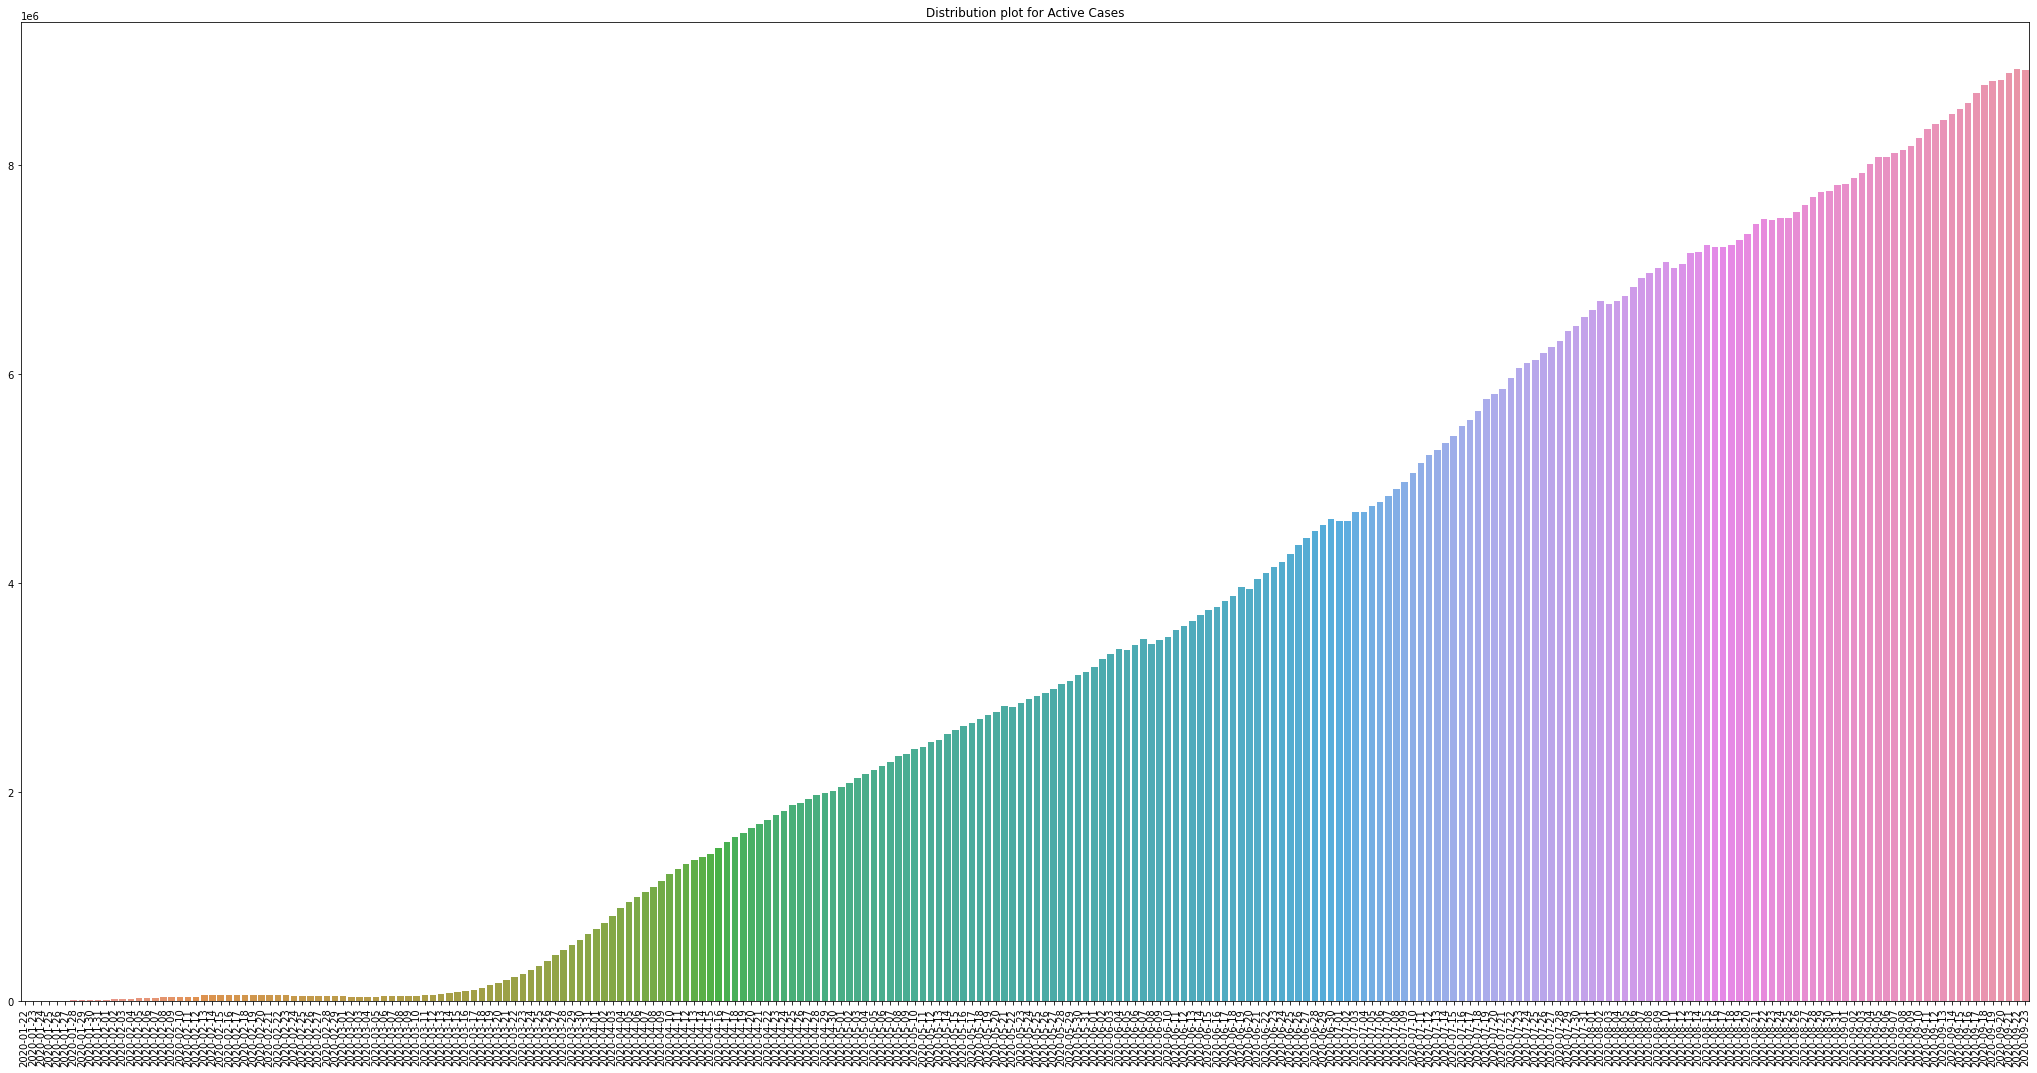

In [ ]:
plt.figure(figsize=(36,18))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution plot for Active Cases")
plt.xticks(rotation=90)

In [ ]:
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

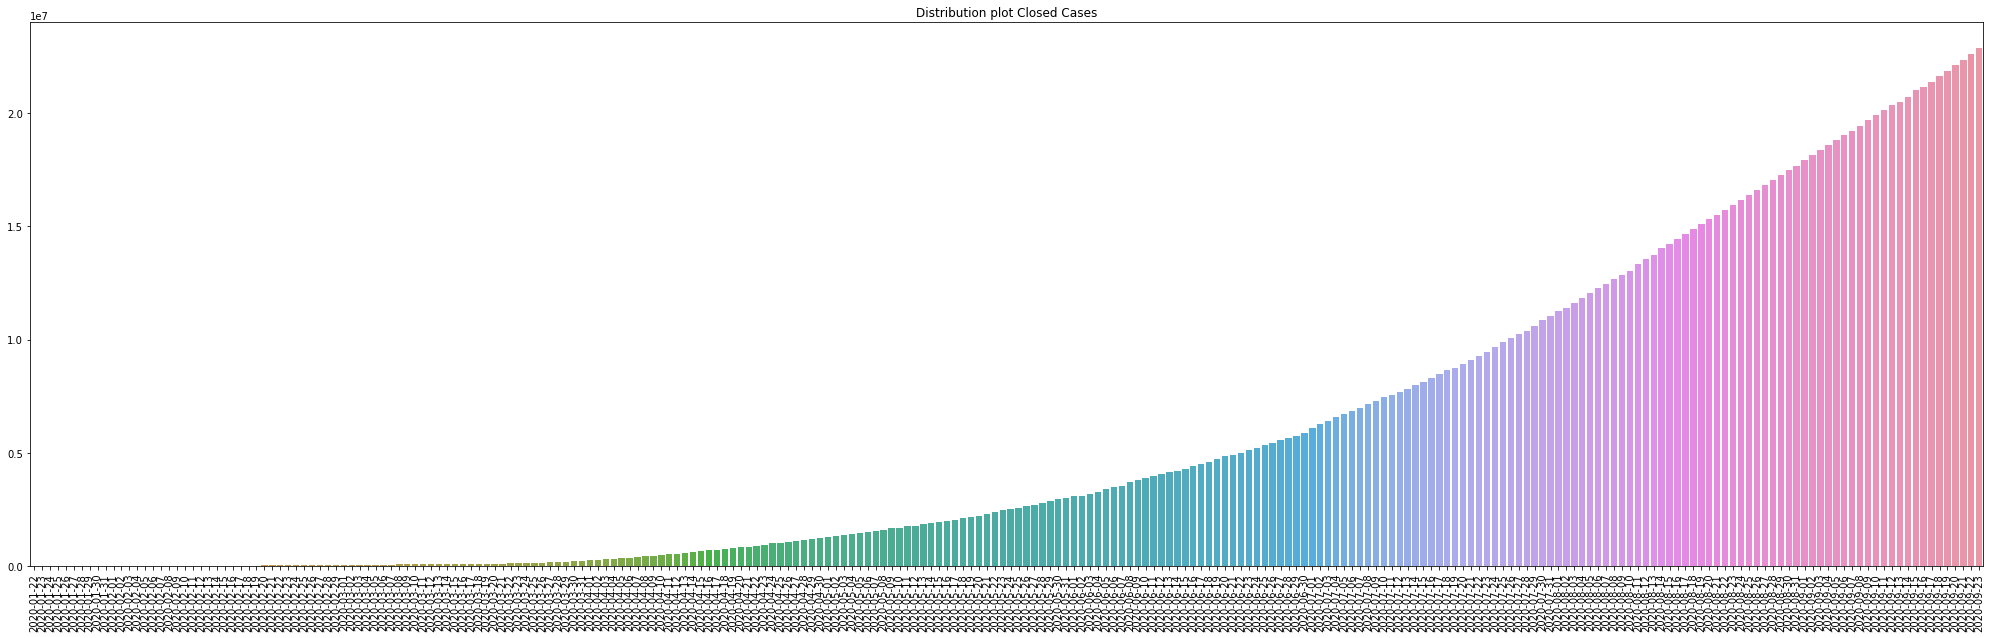

In [ ]:
plt.figure(figsize=(35,10))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot Closed Cases")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



Text(0.5, 1.0, 'Weekly Progress of different types of cases')

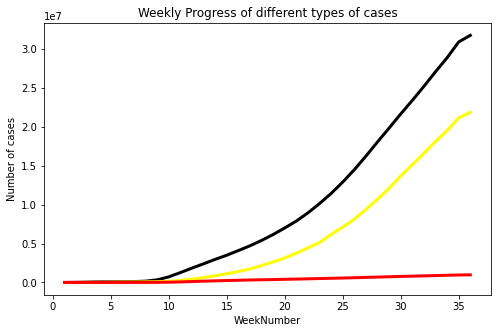

In [ ]:
#weekwise cases
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_deaths = []
w = 1
for i in list(datewise["WeekofYear"].unique()):
  weekwise_confirmed.append(datewise[datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
  weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
  weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num.append(w)
  w = w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3,color='black')
plt.plot(week_num,weekwise_recovered,linewidth=3,color='yellow')
plt.plot(week_num,weekwise_deaths,linewidth=3,color='red')
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

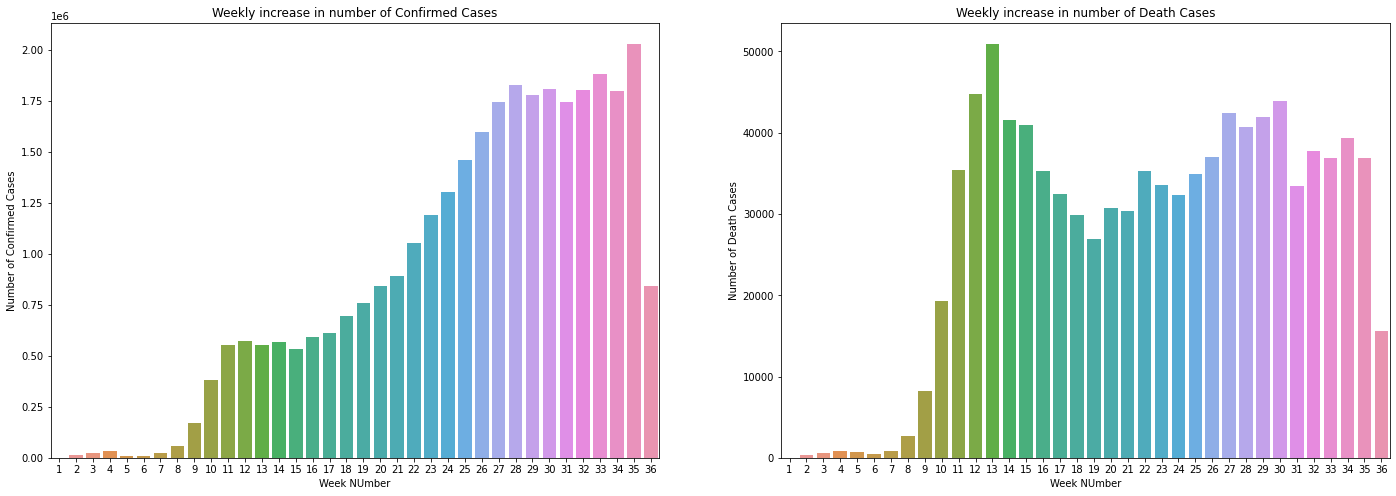

In [ ]:
#graph for confirmed and death cases
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (24,8))
sns.barplot(x= week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week NUmber")
ax2.set_xlabel("Week NUmber")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in number of Confirmed Cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Average Increasing in number of Confirmed cases everyday:  129184.0
Average Increasing in number of Recovered cases everyday:  88985.0
Average Increasing in number of Death cases everyday:  3964.0


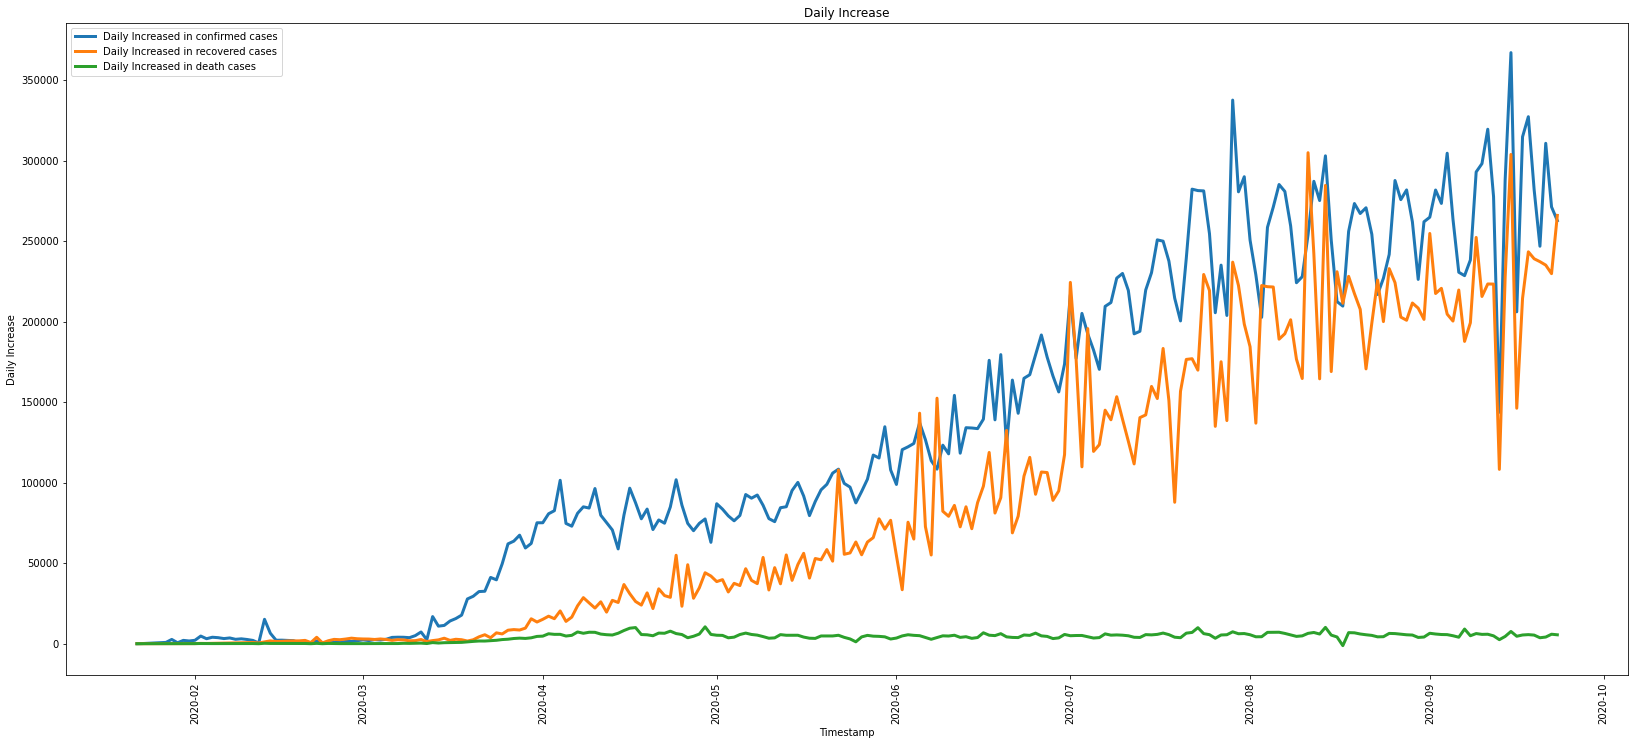

In [ ]:
print("Average Increasing in number of Confirmed cases everyday: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average Increasing in number of Recovered cases everyday: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average Increasing in number of Death cases everyday: ",np.round(datewise["Deaths"].diff().fillna(0).mean())) 

plt.figure(figsize=(28,12))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily Increased in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily Increased in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily Increased in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increase")
plt.title("Daily Increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Recovered"]/datewise["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Deaths"]/datewise["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Average Mortality Rate 4.489434703521251
Median Mortality Rate 4.13538370495493
Average Recovery Rate 42.03177180081855
Median Recovery Rate 45.82947437974793


In [ ]:
print("Average growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).mean())
print("Median growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).median())
print("Average growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).mean())
print("Median growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).median())
print("Average growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).mean())
print("Median growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).median())

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"]/datewise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"]/datewise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"]/datewise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

Average growth factor of number of Confirmed Cases:  1.0489392086912515
Median growth factor of number of Confirmed Cases:  1.0190141239355301
Average growth factor of number of Recovered Cases:  1.060396226808128
Median growth factor of number of Recovered Cases:  1.0282038522334758
Average growth factor of number of Death Cases:  1.0486207544288597
Median growth factor of number of Death Cases:  1.0131569697634333


In [ ]:
#growth factor for active and closed cases
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, 
                         y=(datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])/(datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=(datewise["Recovered"]+datewise["Deaths"])/(datewise["Recovered"]+datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

In [ ]:
countrywise = covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"] = (countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"] = (countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 countries as per death cases')

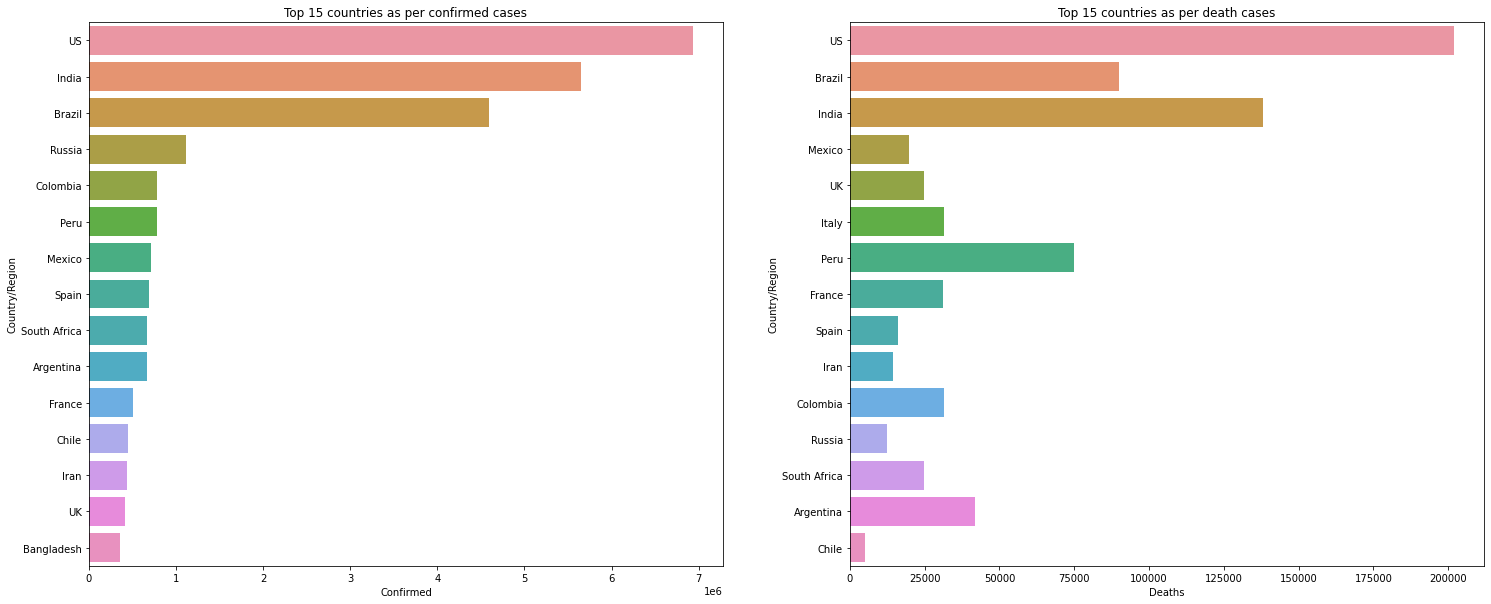

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per confirmed cases")
sns.barplot(x=top_15confirmed["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per death cases")

In [ ]:
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [ ]:
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
country_last_24_confirmed=[]
country_last_24_recovered=[]
country_last_24_deaths=[]
for country in countrywise.index:
    country_last_24_confirmed.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Confirmed"])
    country_last_24_recovered.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Recovered"])
    country_last_24_deaths.append((grouped_country.loc[country].iloc[-1]-grouped_country.loc[country].iloc[-2])["Deaths"])

In [ ]:
Last_24_Hours_country=pd.DataFrame(list(zip(countrywise.index,country_last_24_confirmed,country_last_24_recovered,country_last_24_deaths)),
                                   columns=["Country Name","Last 24 Hours Confirmed","Last 24 Hours Recovered","Last 24 Hours Deaths"])

Text(0.5, 1.0, 'Top 15 Countries with Highest Number of Death Cases in Last 24 Hours')

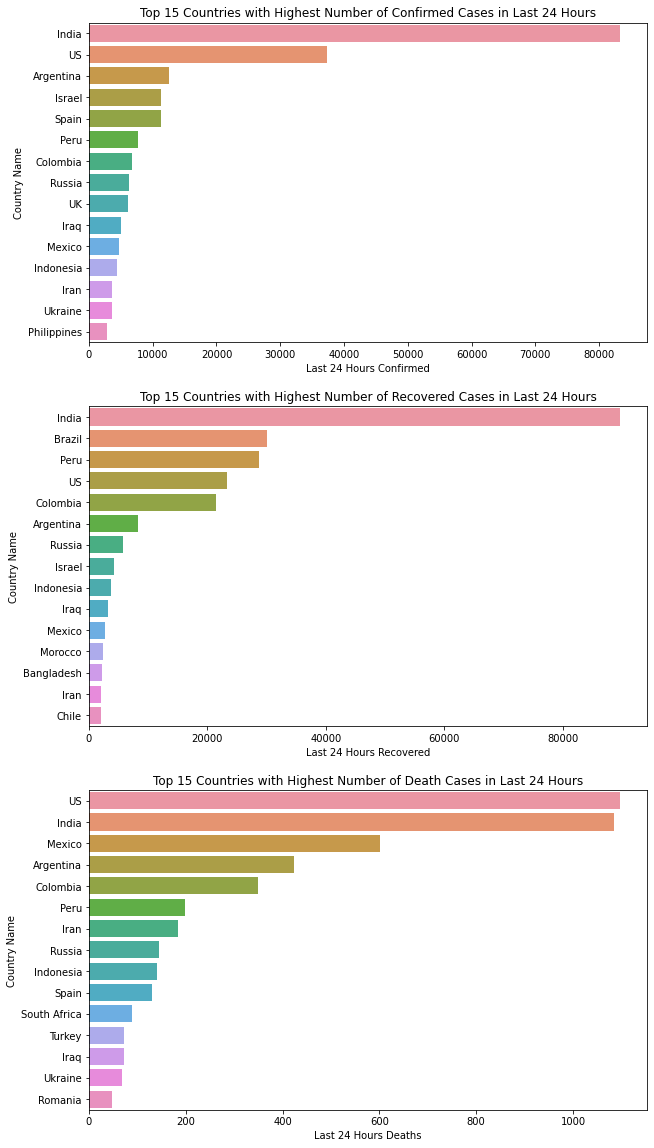

In [ ]:
#barplot for different cases
Top_15_Confirmed_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Confirmed"],ascending=False).head(15)
Top_15_Recoverd_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Recovered"],ascending=False).head(15)
Top_15_Deaths_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Deaths"],ascending=False).head(15)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
sns.barplot(x=Top_15_Confirmed_24hr["Last 24 Hours Confirmed"],y=Top_15_Confirmed_24hr["Country Name"],ax=ax1)
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours")
sns.barplot(x=Top_15_Recoverd_24hr["Last 24 Hours Recovered"],y=Top_15_Recoverd_24hr["Country Name"],ax=ax2)
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last 24 Hours")
sns.barplot(x=Top_15_Deaths_24hr["Last 24 Hours Deaths"],y=Top_15_Deaths_24hr["Country Name"],ax=ax3)
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last 24 Hours")

In [ ]:
#Data Analysis for Bangladesh
Bangladesh_data = covid[covid["Country/Region"]=="Bangladesh"]
datewise_Bangladesh = Bangladesh_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_Bangladesh.iloc[-1])
print("Total Active Cases",datewise_Bangladesh["Confirmed"].iloc[-1]-datewise_Bangladesh["Recovered"].iloc[-1]-datewise_Bangladesh["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_Bangladesh["Recovered"].iloc[-1]+datewise_Bangladesh["Deaths"].iloc[-1])
datewise_Bangladesh.tail()

Confirmed    353844.0
Recovered    262953.0
Deaths         5044.0
Name: 2020-09-23 00:00:00, dtype: float64
Total Active Cases 85847.0
Total Closed Cases 267997.0


,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-09-19,347372.0,254386.0,4913.0
2020-09-20,348918.0,256565.0,4939.0
2020-09-21,350621.0,258717.0,4979.0
2020-09-22,352178.0,260790.0,5007.0
2020-09-23,353844.0,262953.0,5044.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



Text(0.5, 1.0, 'Weekly Progress of different types of cases')

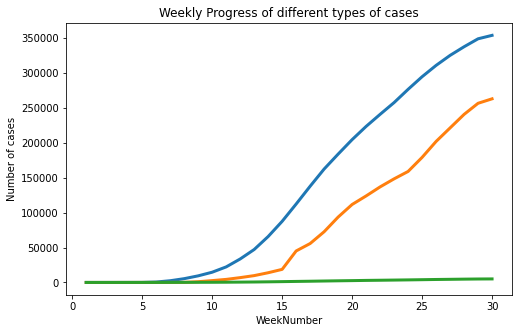

In [ ]:
#weekly progress of different type of cases
datewise_Bangladesh["WeekofYear"] = datewise_Bangladesh.index.weekofyear
week_num_bangladesh = []
bangladesh_weekwise_confirmed = []
bangladesh_weekwise_recovered = []
bangladesh_weekwise_deaths = []
w = 1
for i in list(datewise_Bangladesh["WeekofYear"].unique()):
  bangladesh_weekwise_confirmed.append(datewise_Bangladesh[datewise_Bangladesh["WeekofYear"]==i]["Confirmed"].iloc[-1])
  bangladesh_weekwise_recovered.append(datewise_Bangladesh[datewise_Bangladesh["WeekofYear"]==i]["Recovered"].iloc[-1])
  bangladesh_weekwise_deaths.append(datewise_Bangladesh[datewise_Bangladesh["WeekofYear"]==i]["Deaths"].iloc[-1])
  week_num_bangladesh.append(w)
  w = w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_bangladesh,bangladesh_weekwise_confirmed,linewidth=3)
plt.plot(week_num_bangladesh,bangladesh_weekwise_recovered,linewidth=3)
plt.plot(week_num_bangladesh,bangladesh_weekwise_deaths,linewidth=3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

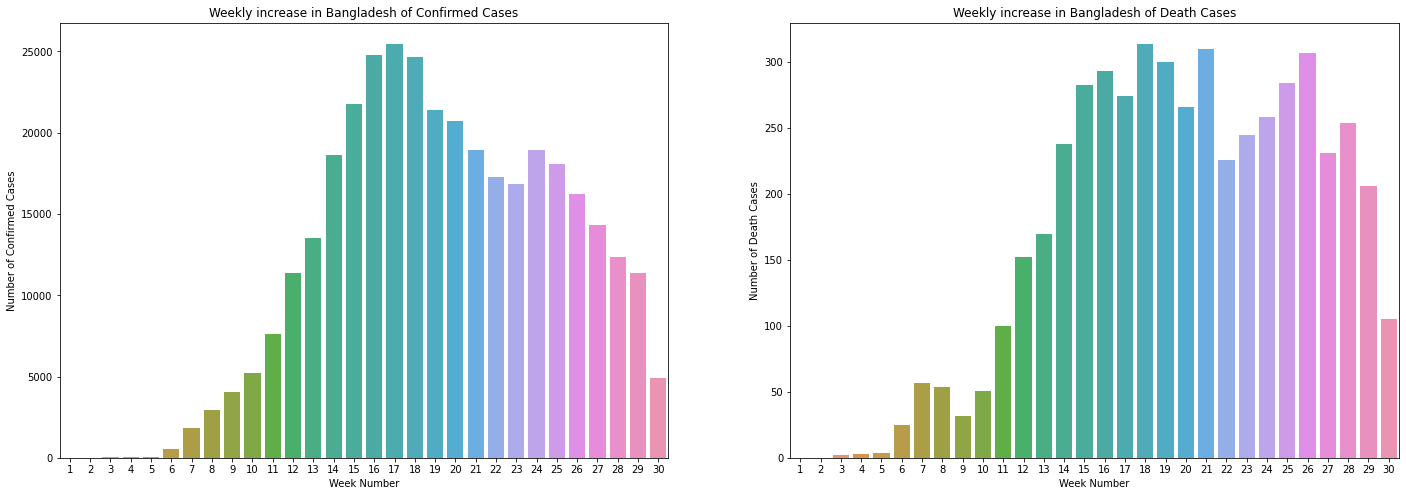

In [ ]:
#weekwise bar plot of confirmed and death cases
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (24,8))
sns.barplot(x= week_num_bangladesh,y=pd.Series(bangladesh_weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num_bangladesh,y=pd.Series(bangladesh_weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Bangladesh of Confirmed Cases")
ax2.set_title("Weekly increase in Bangladesh of Death Cases")
plt.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_Bangladesh.index, y=datewise_Bangladesh["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_Bangladesh.index, y=datewise_Bangladesh["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_Bangladesh.index, y=datewise_Bangladesh["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Average Increasing in number of Confirmed cases everyday:  1769.0
Average Increasing in number of Recovered cases everyday:  1315.0
Average Increasing in number of Death cases everyday:  25.0


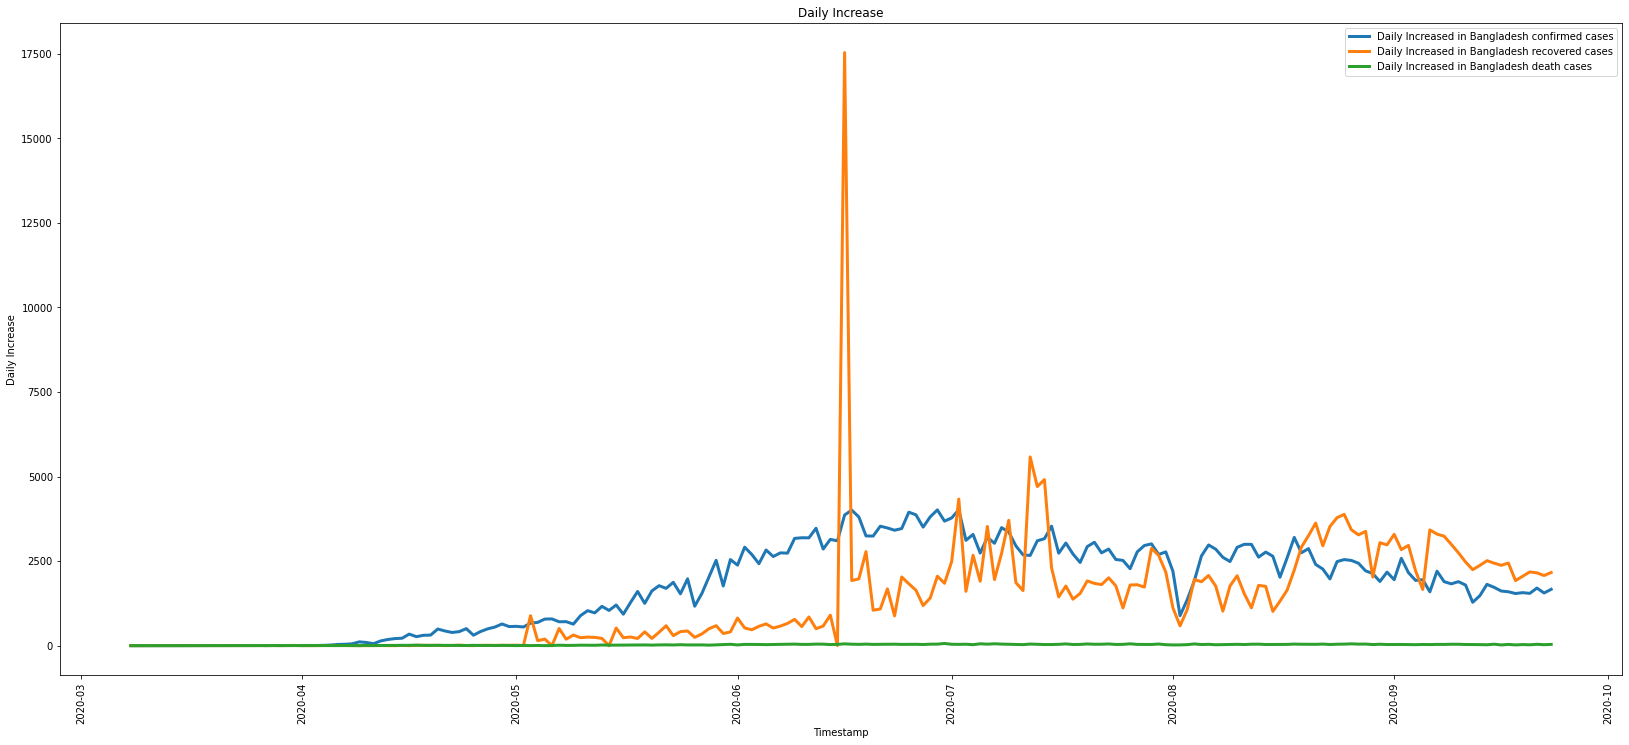

In [ ]:
print("Average Increasing in number of Confirmed cases everyday: ",np.round(datewise_Bangladesh["Confirmed"].diff().fillna(0).mean()))
print("Average Increasing in number of Recovered cases everyday: ",np.round(datewise_Bangladesh["Recovered"].diff().fillna(0).mean()))
print("Average Increasing in number of Death cases everyday: ",np.round(datewise_Bangladesh["Deaths"].diff().fillna(0).mean())) 

plt.figure(figsize=(28,12))
plt.plot(datewise_Bangladesh["Confirmed"].diff().fillna(0),label="Daily Increased in Bangladesh confirmed cases",linewidth=3)
plt.plot(datewise_Bangladesh["Recovered"].diff().fillna(0),label="Daily Increased in Bangladesh recovered cases",linewidth=3)
plt.plot(datewise_Bangladesh["Deaths"].diff().fillna(0),label="Daily Increased in Bangladesh death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increase")
plt.title("Daily Increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
max_bd = datewise_Bangladesh["Confirmed"].max()
India_data = covid[covid["Country/Region"]=="India"]
Italy_data = covid[covid["Country/Region"]=="Italy"]
datewise_india = India_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print("It Took",datewise_Bangladesh[datewise_Bangladesh["Confirmed"]>0].shape[0],"days in Bangladesh to reach",max_bd,"Confirmed Cases")
print("It Took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_bd)].shape[0],"days in Italy to reach number of Confirmed Cases")
print("It Took",datewise_india[(datewise_india["Confirmed"]>0)&(datewise_india["Confirmed"]<=max_bd)].shape[0],"days in India to reach number of Confirmed Cases")


It Took 200 days in Bangladesh to reach 353844.0 Confirmed Cases
It Took 237 days in Italy to reach number of Confirmed Cases
It Took 138 days in India to reach number of Confirmed Cases


In [ ]:
#divide the dataset into training and test dataset
datewise["Days Since"] = datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
test_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores = []

In [ ]:
#Fit linear regression and svm
lin_reg = LinearRegression(normalize = True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
prediction_test_ml_reg = lin_reg.predict(np.array(test_ml["Days Since"]).reshape(-1,1))

In [ ]:
#Check model accuracy for Linear Regression
model_scores.append(np.sqrt(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_reg)))
model_scores.append(mean_absolute_error(test_ml["Confirmed"],prediction_test_ml_reg))
model_scores.append(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_reg))

print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_reg)))
print("Mean Absolute Error for Linear Regression: ",(mean_absolute_error(test_ml["Confirmed"],prediction_test_ml_reg)))
print("Mean Squared Error for Linear Regression: ",(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_reg)))


Root Mean Square Error for Linear Regression:  2982454.4053598912
Mean Absolute Error for Linear Regression:  2608836.8208556245
Mean Squared Error for Linear Regression:  8895034280050.623


In [ ]:
#draw graph for linear regression
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [ ]:
prediction_test_ml_svm = svm.predict(np.array(test_ml["Days Since"]).reshape(-1,1))

In [ ]:
#model accuracy for svm
model_scores.append(np.sqrt(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_svm)))
model_scores.append(mean_absolute_error(test_ml["Confirmed"],prediction_test_ml_svm))
model_scores.append(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_svm))

print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_svm)))
print("Mean Absolute Error for Support Vectore Machine : ",(mean_absolute_error(test_ml["Confirmed"],prediction_test_ml_svm)))
print("Mean Squared Error for Support Vectore Machine: ",(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_svm)))


Root Mean Square Error for Support Vectore Machine:  6544407.205717897
Mean Absolute Error for Support Vectore Machine :  5211061.4463677835
Mean Squared Error for Support Vectore Machine:  42829265674252.33


In [ ]:
#draw graph of train data and svm best fit kernel
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [ ]:
#prediction using LR and SVR
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,18):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' %x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(10)

,Dates,LR,SVR
0,2020-09-24,23113975,16559917
1,2020-09-25,23231109,16808455
2,2020-09-26,23348242,17061051
3,2020-09-27,23465375,17317754
4,2020-09-28,23582509,17578614
5,2020-09-29,23699642,17843682
6,2020-09-30,23816776,18113007
7,2020-10-01,23933909,18386642
8,2020-10-02,24051042,18664637
9,2020-10-03,24168176,18947045


In [ ]:
#spliting the datasets
model_train = datewise.iloc[:int(datewise.shape[0]*0.85)]
test = datewise.iloc[int(datewise.shape[0]*0.85):]

In [ ]:
#fitting holt linear model
holt = Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = test.copy()
y_pred["Holt"]=holt.forecast(len(test))


In [ ]:
#evaluate model accuracy
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
model_scores.append(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"]))
model_scores.append(mean_absolute_error(y_pred["Confirmed"],y_pred["Holt"]))


print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Mean Absolute Error for Holt's Linear Model: ",mean_absolute_error(y_pred["Confirmed"],y_pred["Holt"]))
print("Mean Squared Error for Holt's Linear Model: ",mean_squared_error(y_pred["Confirmed"],y_pred["Holt"]))

Root Mean Square Error Holt's Linear Model:  443268.71246958454
Mean Absolute Error for Holt's Linear Model:  363524.4129099718
Mean Squared Error for Holt's Linear Model:  196487151454.4432


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=test.index, y=test["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=test.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
#holt linear model prediction for world data
holt_new_date = []
holt_new_prediction = []
for i in range(1,18):
  holt_new_date.append(datewise.index[-1]+timedelta(days=i))
  holt_new_prediction.append(holt.forecast(len(test)+i)[-1])
model_predictions["Holts Linear Model Prediction"] = holt_new_prediction
model_predictions.head()

,Dates,LR,SVR,Holts Linear Model Prediction
0,2020-09-24,23113975,16559917,31149384
1,2020-09-25,23231109,16808455,31393572
2,2020-09-26,23348242,17061051,31637761
3,2020-09-27,23465375,17317754,31881949
4,2020-09-28,23582509,17578614,32126137


In [ ]:
#dividing the datasets
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
test=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=test.copy()

In [ ]:
#fitting th holt winter model
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=14,trend='add', seasonal='mul').fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
#Check accuracy of the model
y_pred["Holt's Winter Model"]=es.forecast(len(test))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
model_scores.append(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))
model_scores.append(mean_absolute_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))

print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Mean Absolute Error for Holt's Winter Model: ",mean_absolute_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))
print("Mean Squared Error for Holt's Winter Model: ",mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))

Root Mean Square Error for Holt's Winter Model:  121656.62220388037
Mean Absolute Error for Holt's Winter Model:  93648.47769294049
Mean Squared Error for Holt's Winter Model:  14800333726.057678


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=test.index, y=test["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=test.index, y=y_pred["Holt\'s Winter Model"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
#prediction for world data 
holt_new_date = []
holt_new_prediction = []
holt_winter_new_prediction=[]
for i in range(1,18):
  holt_new_date.append(datewise.index[-1]+timedelta(days=i))
  holt_winter_new_prediction.append(es.forecast((len(test)+i))[-1])

model_predictions["Holts Winter Model Prediction"] = holt_winter_new_prediction
model_predictions.head()

,Dates,LR,SVR,Holts Linear Model Prediction,Holts Winter Model Prediction
0,2020-09-24,23113975,16559917,31149384,31902422
1,2020-09-25,23231109,16808455,31393572,32216311
2,2020-09-26,23348242,17061051,31637761,32497523
3,2020-09-27,23465375,17317754,31881949,32723880
4,2020-09-28,23582509,17578614,32126137,32977149


In [ ]:
print("Shape of Data is ==> ",Bangladesh_data.shape)

Shape of Data is ==>  (200, 8)


In [ ]:
data_bd = covid[covid['Country/Region'] == 'Bangladesh'] 
data_bd = data_bd.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}) 
data_bd["WeekofYear"]=data_bd.index.weekofyear 
data_bd["Days Since"]=(data_bd.index-data_bd.index[0])
data_bd["Days Since"]=data_bd["Days Since"].dt.days
data_bd["Active"] = data_bd["Confirmed"] - data_bd["Recovered"] - data_bd["Deaths"]
data_bd = data_bd.reset_index()
data_bd.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



,ObservationDate,Confirmed,Recovered,Deaths,WeekofYear,Days Since,Active
0,2020-03-08,3,0,0,10,0,3
1,2020-03-09,3,0,0,11,1,3
2,2020-03-10,3,0,0,11,2,3
3,2020-03-11,3,0,0,11,3,3
4,2020-03-12,3,0,0,11,4,3


In [ ]:
fig = px.bar(data_bd, x='ObservationDate', y='Confirmed',color='Confirmed', height=500)
fig.update_layout(title='Confirmed Cases in Bangladesh',
                 xaxis_title="Date",
                 yaxis_title="Confirmed Cases")

In [ ]:
fig = px.bar(data_bd, x='ObservationDate', y='Deaths',color='Deaths',template='ggplot2', height=500)
fig.update_layout(title='Deaths in Bangladesh',
                 xaxis_title="Date",
                 yaxis_title="Deaths")

In [ ]:
fig = px.bar(data_bd, x='ObservationDate', y='Recovered',color='Recovered',template='plotly_white', height=500)
fig.update_layout(title='Recovered Cases in Bangladesh',
                 xaxis_title="Date",
                 yaxis_title="Recovered Cases")

In [ ]:
fig = px.bar(data_bd, x='ObservationDate', y='Active',color='Active',template='plotly_white', height=500)
fig.update_layout(title='Active Cases in Bangladesh',
                 xaxis_title="Date",
                 yaxis_title="Active Cases")

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_bd['ObservationDate'], y=data_bd["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=data_bd['ObservationDate'], y=data_bd["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=data_bd['ObservationDate'], y=data_bd["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
#fig.update_layout(title="Confirmed vs Recovered vs Deaths due to CORONA in Bangladesh",
 #                xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
data_bd['Active'] = data_bd['Confirmed'] - data_bd['Recovered'] - data_bd['Deaths']
fig=go.Figure(data=go.Pie(labels=['Active','Recovered','Deaths'],
                values=[data_bd.iloc[data_bd['ObservationDate'].idxmax(axis=1)]['Active'],
                        data_bd.iloc[data_bd['ObservationDate'].idxmax(axis=1)]['Recovered'],
                        data_bd.iloc[data_bd['ObservationDate'].idxmax(axis=1)]['Deaths']
                       ]),layout={'template':'presentation'})
fig.update_layout(title_text="Coronavirus Cases in Bangladesh as of "+data_bd['ObservationDate'].max().strftime("%d-%b'%y"))
fig.show()

In [ ]:
whole = data_bd.groupby('ObservationDate')['ObservationDate','Confirmed','Deaths','Recovered','Active'].sum().reset_index()
fig = make_subplots(rows=1,cols=4,column_titles = ('Confirmed','Deaths','Recovered','Active'))

trace_1 = go.Scatter(x=whole['ObservationDate'],y=whole['Confirmed'],name='Confirmed',opacity=0.9,mode='lines+markers',line_color='blue')

trace_2 = go.Scatter(x=whole['ObservationDate'],y=whole['Deaths'],name='Deaths',opacity=0.9,mode='lines+markers',line_color='red')

trace_3 = go.Scatter(x=whole['ObservationDate'],y=whole['Recovered'],name='Recovered',opacity=0.9,mode='lines+markers',line_color='gold')

trace_4 = go.Scatter(x=whole['ObservationDate'],y=whole['Active'],name='Active',opacity=0.9,mode='lines+markers',line_color='yellow')


fig.append_trace(trace_1,1,1)
fig.append_trace(trace_2,1,2)
fig.append_trace(trace_3,1,3)
fig.append_trace(trace_4,1,4)

fig.update_layout(title_text="Spread of Corona Virus Overtime in Bangladesh")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
#dividing the datasets
train_ml=data_bd.iloc[:int(data_bd.shape[0]*0.95)]
test_ml=data_bd.iloc[int(data_bd.shape[0]*0.95):]
model_scores=[]

In [ ]:
Confirmed = test_ml['Confirmed'].reset_index(drop=True)

In [ ]:
#import class and fitting the model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression(normalize=True)

lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
prediction_valid_linreg=lin_reg.predict(np.array(test_ml["Days Since"]).reshape(-1,1))

In [ ]:
Prediction_Linear_Regression = prediction_valid_linreg.tolist()

In [ ]:
#import the accuracy model function and acccuracy model for LR
from sklearn.metrics import mean_squared_error,r2_score
model_scores.append(np.sqrt(mean_squared_error(test_ml["Confirmed"],prediction_valid_linreg)))
model_scores.append(mean_absolute_error(test_ml["Confirmed"],prediction_valid_linreg))
model_scores.append(mean_squared_error(test_ml["Confirmed"],prediction_valid_linreg))

print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(test_ml["Confirmed"],prediction_valid_linreg)))
print("Mean Absolute Error for Linear Regression: ",(mean_absolute_error(test_ml["Confirmed"],prediction_valid_linreg)))
print("Mean Squared Error for Linear Regression: ",(mean_squared_error(test_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  22198.1574094451
Mean Absolute Error for Linear Regression:  22158.481489500264
Mean Squared Error for Linear Regression:  492758192.3745023


In [ ]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(data_bd["Days Since"]).reshape(-1,1))
linreg_output=[]
for i in range(prediction_linreg.shape[0]):
    linreg_output.append(prediction_linreg[i][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=data_bd.index, y=data_bd["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=data_bd.index, y=linreg_output,
                    mode='lines',name="Linear Regression Best Fit Line",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Linear Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [ ]:
#prediction of Bd Linear Regression
new_date = []
new_prediction_lr = []
for i in range(1,18):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
pd.set_option("display.float_format",lambda x: '%.f' %x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr),columns = ["Dates","LR"])
model_predictions.head(5)

,Dates,LR
0,2020-09-24,430535
1,2020-09-25,432595
2,2020-09-26,434655
3,2020-09-27,436715
4,2020-09-28,438775


In [ ]:
#dividing the datasets
train_ml=data_bd.iloc[:int(data_bd.shape[0]*0.95)]
test_ml=data_bd.iloc[int(data_bd.shape[0]*0.95):]

In [ ]:
#fitting model with data and accuracy of SVM
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)

#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))




prediction_test_ml_svm = svm.predict(np.array(test_ml["Days Since"]).reshape(-1,1))

model_scores.append(np.sqrt(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_svm)))
model_scores.append(mean_absolute_error(test_ml["Confirmed"],prediction_test_ml_svm))
model_scores.append(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_svm))


print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_svm)))
print("Mean Absolute Error for Support Vectore Machine: ",(mean_absolute_error(test_ml["Confirmed"],prediction_test_ml_svm)))
print("Mean Squared Error for Support Vectore Machine: ",(mean_squared_error(test_ml["Confirmed"],prediction_test_ml_svm)))

Root Mean Square Error for Support Vectore Machine:  207887.17384512696
Mean Absolute Error for Support Vectore Machine:  205073.46311458477
Mean Squared Error for Support Vectore Machine:  43217077049.31404


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
Prediction_SVM_Regression = prediction_test_ml_svm.tolist()

In [ ]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(data_bd["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=data_bd.index, y=data_bd["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=data_bd.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [ ]:
#prediction usin LR and SVR
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,18):
  new_date.append(datewise.index[-1]-timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(data_bd["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(data_bd["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' %x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(5)

,Dates,LR,SVR
0,2020-09-22,335777,628820
1,2020-09-21,337837,644009
2,2020-09-20,339897,659503
3,2020-09-19,341957,675307
4,2020-09-18,344017,691426


In [ ]:
#prediction using LR and SVR
new_date = []
new_prediction_lr = []
new_prediction_svm = []
for i in range(1,18):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(data_bd["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(data_bd["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' %x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(5)

,Dates,LR,SVR
0,2020-09-24,335777,628820
1,2020-09-25,337837,644009
2,2020-09-26,339897,659503
3,2020-09-27,341957,675307
4,2020-09-28,344017,691426


In [ ]:
#spliting the datasets
model_train=data_bd.iloc[:int(data_bd.shape[0]*0.95)]
test=data_bd.iloc[int(data_bd.shape[0]*0.95):]
y_pred=test.copy()

In [ ]:
#model fitting for holt winter
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=14,trend='add', seasonal='mul').fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
#accuracy model of holt winter model
y_pred["Holt's Winter Model"]=es.forecast(len(test))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
model_scores.append(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))
model_scores.append(mean_absolute_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))


print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Mean Absolute Error for Holt's Winter Model: ",mean_absolute_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))
print("Mean Squared Error for Holt's Winter Model: ",mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))

Root Mean Square Error for Holt's Winter Model:  2863.843094874958
Mean Absolute Error for Holt's Winter Model:  2790.340792344895
Mean Squared Error for Holt's Winter Model:  8201597.272062978


In [ ]:
#holt winter model prediction
holt_new_date = []
holt_winter_new_prediction = []
for i in range(1,18):
  holt_new_date.append(datewise.index[-1]+timedelta(days=i))
  holt_winter_new_prediction.append(es.forecast((len(test)+i))[-1])

model_predictions["Holts Winter Model Prediction"] = holt_winter_new_prediction
model_predictions.head(10)

,Dates,LR,SVR,Holts Winter Model Prediction
0,2020-09-24,335777,628820,359603
1,2020-09-25,337837,644009,361555
2,2020-09-26,339897,659503,363147
3,2020-09-27,341957,675307,366309
4,2020-09-28,344017,691426,368095
5,2020-09-29,346077,707863,369876
6,2020-09-30,348137,724625,372154
7,2020-10-01,350197,741715,374124
8,2020-10-02,352257,759139,375812
9,2020-10-03,354317,776901,377492


In [ ]:
#splitting the datasets
model_train = data_bd.iloc[:int(data_bd.shape[0]*0.85)]
test = data_bd.iloc[int(data_bd.shape[0]*0.85):]

In [ ]:
#fitting holt linear model with data
holt = Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = test.copy()
y_pred["Holt"]=holt.forecast(len(test))

In [ ]:
#accuracy of holt linear
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
model_scores.append(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"]))
model_scores.append(mean_absolute_error(y_pred["Confirmed"],y_pred["Holt"]))


print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Mean Absolute Error for Holt's Linear Model: ",mean_absolute_error(y_pred["Confirmed"],y_pred["Holt"]))
print("Mean Squared Error for Holt's Linear Model: ",mean_squared_error(y_pred["Confirmed"],y_pred["Holt"]))

Root Mean Square Error Holt's Linear Model:  9279.906137978258
Mean Absolute Error for Holt's Linear Model:  7220.524035928158
Mean Squared Error for Holt's Linear Model:  86116657.92968656


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=test.index, y=test["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=test.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
#predictionof bd data using all the models
holt_new_date = []
holt_new_prediction = []
for i in range(1,18):
  holt_new_date.append(datewise.index[-1]+timedelta(days=i))
  holt_new_prediction.append(holt.forecast(len(test)+i)[-1])
model_predictions["Holts Linear Model Prediction"] = holt_new_prediction
model_predictions.head(10)

,Dates,LR,SVR,Holts Winter Model Prediction,Holts Linear Model Prediction
0,2020-09-24,335777,628820,359603,374813
1,2020-09-25,337837,644009,361555,377317
2,2020-09-26,339897,659503,363147,379821
3,2020-09-27,341957,675307,366309,382325
4,2020-09-28,344017,691426,368095,384829
5,2020-09-29,346077,707863,369876,387332
6,2020-09-30,348137,724625,372154,389836
7,2020-10-01,350197,741715,374124,392340
8,2020-10-02,352257,759139,375812,394844
9,2020-10-03,354317,776901,377492,397348
